In [18]:
# -*- coding: utf-8 -*-

#Created on Sat Nov 21 16:42:26 2020

#@pypStag-Lessons #01
#@author: Alexandre JANIN
#__All rights reserved__

<div style="text-align: Right">
    <img src="./icons/pypStag_logographie_texte.jpg" width="200">
</div>

<center> <h1><b>Lesson 1 - Read and process Stag outputs</b></h1> </center>

Functions, routines and documentation of **pypStag** contain lots of typos and unachieved branches. Before use this code, keep that in mind and contact me for bugs or development suggestions: **Alexandre JANIN, alexandre.janin7@gmail.com**

### **What to manipulate? Some generalities**

Stag outputs can be sorted in many different ways: (1) sorted according to field types like grouping all viscosity outputs on one side, all temperature outputs on another side... or (2) sorted according grid geomtry (YinYang, Cartesian 2D and 3D and annulus) or (3) sorted by field nature (Salar or Vectorial)

**pypStag** is based on objects manipulations. Thus, we did choices to build efficiently object easily manipulated by users. (All these objects are defined in the _**stagData.py**_ module). **pypStag** typing is based on the grid geometry of the Stag output you read.\
Thanks to the conditional inheritance, few objects will be directly used by the user. Thus, all the reading operations are managed using a single conditional object: **StagData** that will have the type **stagData.StagCartesianGeometry** or **stagData.StagYinYangGeometry** according the geometry of the grid you will read.\
Thus typing of **pypStag** is based on geomtry and not in field type

Thanks to the conditional inheritance, few objects will be directly used by the user. Thus, all the reading operations are managed using a single conditional object: **StagData** that will have the type **stagData.StagCartesianGeometry**, **stagData.StagYinYangGeometry** or **stagData.StagSphericalGeometry** according the geometry of the grid you will read. The following figure show the geometry dependance of the **pypStag** types.

<img src="./img/StagObjects_01_01.png" alt="pypStag types-geometries relations" width="600" >

**Figure 1.** Types-Geometries relationship in **pypStag**. **MainStagObject** is the parental object. Orange object are all the **stagData** objects of **pypStag**. In gray the corresponding grid geometry and between '' the string character defining the geometry in **pypStag**.

Thus, you have to keep in mind that some fields will stay empty after the reading and the processing of your Stag output. For instance, after the reading of an output file associated to a scalar field (like a temperature file), fields corresponding to vectorial fields will be created but not filled. Several tags are implemented on all **pypStag** main objects to help users not to lose the nature of the fields they manipulate. You don't need to specify the nature of the field contained in the stagyy binary file, **pypStag** will do it automatically. Everything will be clearer later when we detail the following chapters.

We will see now how to read, process and manipulate Stag outputs with **pypStag**!

### **Lesson Summary**

    0. Package importation
    1. Read and process StagYY outputs with Cartesian geometries
    2. Read and process StagYY outputs with Yin-Yang geometry
    3. Read and process StagYY outputs with Spherical geomtry

### **0. Package importation**

In [19]:
# Basic packages you will use in this lesson

import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Importation of pypStag

import sys
sys.path.append('../')           # referencing the pypStag directory

from pypStag.stagData import StagData    # pypStag objects package

### **1. Read and process Stag outputs with Cartesian geometries**

The reading and the processing are two steps totaly managed by **pypStag**. The only necessary and sufficient information that you need to specify (except of course the path and file name of your output) is the grid geometry (**Figure 1** for geometry codes). Here we will see step by step how to read an output file of Stag with a Cartesian grid geometry, 2D or 3D, using **pypStag**.

Let consider the output file _**'./test_data/SRW42mpi3D_eta00001'**_ containing a viscosity field (Scalar) in cartesian 3D geometry.

In [21]:
# First, set the file name and the path:

directory = './test_data/'           # path to my data
fname     = 'SRW42mpi3D_eta00001'    # file name of my stagyy output under cartesian 3D geometry

In [22]:
# Then, creat our StagData object:

sd = StagData(geometry='cart3D')     # call it sd and very important, specify the geometry! (see Figure 1 for allowed values)
sd.verbose = True                    # activate the verbose output if you want to follow what he is doing

We just created a data structure that will allow you to efficiently manipulate your Stag data.

Now, apply the internal function **.stagImport** to load Stag data on the good fields and compute several flags. Give just to the **stagImport** function the _path_ and the _file name_ of the file containing your stagyy data. You can specify in option a resampling parameter as well as a first (shallowest) and a last (deepest) index. Let see an example:

In [23]:
# Then load the file contents in your StagData object

sd.stagImport(directory, fname, resampling=[2,2,1])
# Here we resample the grid for the example (resampling parameters is for x, y, and z directions, repsectively)

>> stagData| Reading and resampling: SRW42mpi3D_eta00001
>> stagData|   - 3D data detected
>> stagData|     -> Grid geometry compatible with cart3D or spherical
>> stagData|   - Original grid geometry:
>> stagData|     - Nx = 192
>> stagData|     - Ny = 192
>> stagData|     - Nz = 64
>> stagData|   - New grid geometry:
>> stagData|     - Nx = 97
>> stagData|     - Ny = 97
>> stagData|     - Nz = 64
>> stagData|   - Scalar field detected
>> stagData|     -> Viscosity
>> stagData| Reading and resampling operations done!


If you made a mistake in the definition of your stagData instance geometry, **pypStag** will raise an error except but not in all cases (impossible to make the difference between cart3D and spherical). So be careful.

Now, our Stagyy raw data are loaded in your StagData instance **'sd'** but they are not fully available and usable. They need to be processed according to their geometry to complete the loading.

In [24]:
# Then, process the raw data you load into your stagData object

sd.stagProcessing() 

>> stagData| Processing stag Data:
>> stagData|   - Grid Geometry
>> stagData|       - 3D cartesian grid geometry
>> stagData|       - Build data grid for scalar field
>> stagData| Processing of stag data done!


Now, the contents of your stag output file is stored into the **StagData** instance **'sd'**! Notice that the type of your **StagData** instance is **stagData.StagCartesianGeometry** (see **Figure 1**).

In [25]:
print('Type of my stagData instance:\t',type(sd))

Type of my stagData instance:	 <class 'pypStag.stagData.StagCartesianGeometry'>


Here the description of all the fields associated to a **stagData.StagCartesianGeometry** that you would be likely to use:

<img src="./img/StagObjects_03_02.png" alt="pypStag types-geometries relations" width="1200" >

**Figure 2.** Main fields of a stagData.StagCartesianGeomtry object. In **violet** corresponds to the description fields of the data, **red** to the grid, **light orange** to scalar field (if the stagyy binary contained a scalar field, else, created but stay empty), **light blue** to vectorial field (if the stagyy binary contained a vectorial field, else, created but stay empty).

Now, you can manipulate your data. **Figure 2** describe you all usefull fields. Here, some examples:

In [26]:
# You can have a look on the grid properties playing with descriptive fields (violet on figure 2)

print('-- File description:')
print('Path of my binary file:\t',sd.path)
print('File name:\t\t',sd.fname)
print('My resampling:\t\t',sd.resampling)
print('\n-- Grid description')
print('Original Nx, Ny, Nz:\t',(sd.nx0,sd.ny0,sd.nz0))
print('Current Nx, Ny, Nz:\t',(sd.nx,sd.ny,sd.nz))
print('Shape of my grid:\t',sd.x.shape)
print('\n-- Data description:')
print('Iteration number:\t',sd.ti_step)
print('Internal time:\t\t',sd.simuAge)
print('Field Nature:\t\t',sd.fieldNature)
print('Type of field:\t\t',sd.fieldType)

-- File description:
Path of my binary file:	 test_data/SRW42mpi3D_eta00001
File name:		 SRW42mpi3D_eta00001
My resampling:		 [2, 2, 1]

-- Grid description
Original Nx, Ny, Nz:	 (192, 192, 64)
Current Nx, Ny, Nz:	 (97, 97, 64)
Shape of my grid:	 (97, 97, 64)

-- Data description:
Iteration number:	 153
Internal time:		 0.00045511758
Field Nature:		 Scalar
Type of field:		 Viscosity


Stagyy data loaded in the current instance of **stagData** object (**'sd'**) corresponds to the viscosity field on a cartesian 3D grid geometry at a single time step. The viscosity field contained in the stagyy binary file you read with **pypStag** is a scalar field. During the building of the **stagData** instance, the data structures of scalar field and vectorial field were both created. However, as the binary file you read contains viscosity data, only scalar field of your **stagData** instance have been filled (**sd.v**, see **Figure 2**). **sd.vx**, **sd.vy** and **sd.vz** stay empty. However, if your input stagyy binary file contains velocity-pressure data (for instance), all vectorial field of **sd** will be filled (**sd.vx**, **sd.vy** and **sd.vz**) as well as the particular pressure field **sd.P** (because of the 'velocity-pressure') and the scalar field **sd.v** which will contained the L2-norm of the vectorial field.

In [27]:
# Illustration of fields created during the processing:

print('-- Fields:')
print('Shape of the scalar field (sd.v):\t\t\t',sd.v.shape)
print('Shape of the vectorial fields (sd.vx, sd.vy...):\t',sd.vx.shape)

-- Fields:
Shape of the scalar field (sd.v):			 (97, 97, 64)
Shape of the vectorial fields (sd.vx, sd.vy...):	 (0,)


**Note:** *You can run again all cells of this lesson changing the input binary file with a vectorial field.*

**pypStag** has is own visualisation package that will be the aim of a next lesson. For the moment, let just use Matplotlib to represent data on your **stagData** instance. Let's represent on two maps the surface on the CMB of the log10 of the viscosity field loaded on **'sd'**.

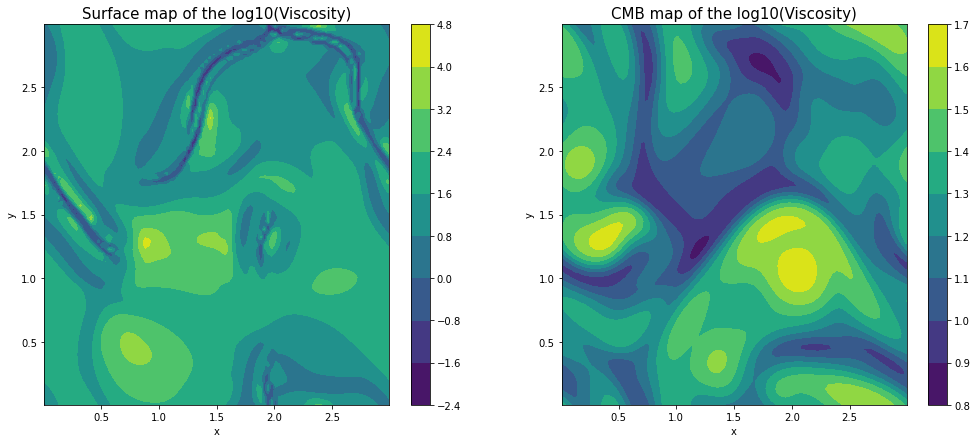

In [28]:
# Basic graphical representation of your data

# The log10 of the viscosity
v = np.log10(sd.v)

# The plot
fig = plt.figure(figsize=(17,7))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Surface map of the log10('+sd.fieldType+')',size='15')
cmap1 = ax1.contourf(sd.x[:,:,-1],sd.y[:,:,-1],v[:,:,-1],)
cbar1 = plt.colorbar(cmap1)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('CMB map of the log10('+sd.fieldType+')',size='15')
cmap2 = ax2.contourf(sd.x[:,:,0],sd.y[:,:,0],v[:,:,0],)
cbar2 = plt.colorbar(cmap2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()

As seen before, for the Cartesian grid geometry, fields and grid matrices are explicitly 3D (not the case for the Yin yang geometry). Thus, is easy to navigate on the grid. In the following cell, an example of this property with the computation of the mean vertical profile of the log10 of the Viscosity.

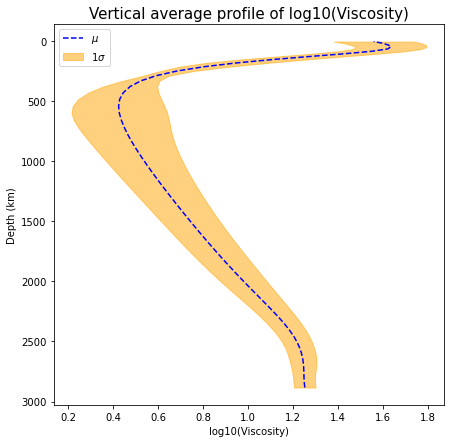

In [29]:
# Representation of the mean log10 viscosity vertical profile

# The average vertical profile of the log10(viscosity)
v     = np.log10(sd.v)
vmean = np.mean(np.mean(v,axis=0),axis=0)
vstd  = np.std(np.std(v,axis=0),axis=0)

# The plot
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
ax.set_title('Vertical average profile of log10('+sd.fieldType+')',size=15)
ax.fill_betweenx(sd.depths,vmean-vstd,vmean+vstd,color='orange',alpha=0.5,label=r'$1\sigma$')
ax.plot(vmean,sd.depths,'--',c='blue',label=r'$\mu$')
ax.set_ylabel('Depth (km)')
ax.set_xlabel('log10('+sd.fieldType+')')
plt.gca().invert_yaxis()
plt.legend()
plt.show()

You can also represent your data stored on your **StagData** instance **'sd'** in 3D using visualization package of **pypStag**. It will be the aim of a next lesson. In the following cell, a basic example using just the **mpl_toolkit** package of **Matplotlib**: Surface 3D map of the log10 of the Viscosity.

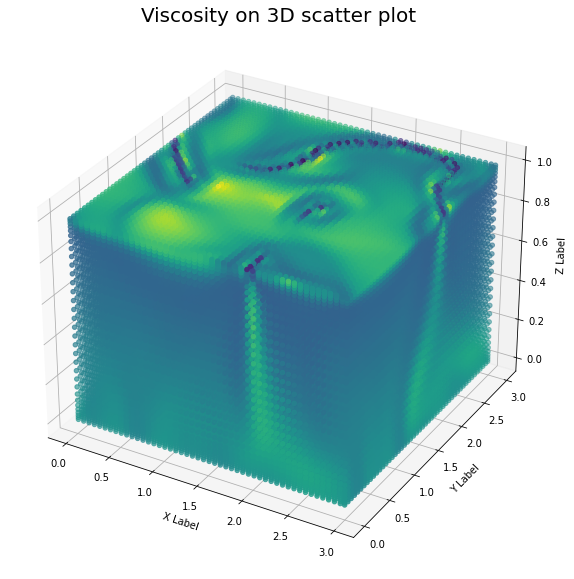

In [30]:
# Using the mpl_toolkit package
from mpl_toolkits.mplot3d import Axes3D

# Relieve the graphics module by resampling data (and grid)
xs = sd.x[::2,::2,::2]
ys = sd.y[::2,::2,::2]
zs = sd.z[::2,::2,::2]
vs = np.log10(sd.v[::2,::2,::2])

# The plot
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Viscosity on 3D scatter plot',size=20)
cmap = ax.scatter(xs, ys, zs, c=vs)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

**Cartesian 2D:** In the above example, we detailed the case of a viscosity field on a **cartesian 3D** grid. The reading and the processing routines for the case of the **cartesian 2D** geometry as the same as previously discussed for the **cartesian 3D** case. You have just to remenber that you have to correctly specify the geometry during the creation of the **stagData** instance.\
In **2D**, shapes of the loaded field (here viscosity) and the grid will also be as **(Nx,Ny,Nz)**. However, as in **2D** there is one 'unused' dimension, Nx or Ny will be one (depending on your stagyy parametrisation). You can run again all cells of this lesson and change the input stagyy binary file with a cartesian 2D data.

You have now all the necessary knowlegdes to be able to read the **stagyy** binary outputs on a Cartesian geometry with **pypStag** and manipulate the grid and the data fields with Python.

### **2. Read and process Stag outputs with Yin Yang geometry**

Here we will see step by step how to read an output file of Stag with a Yin Yang grid geometry using **pypStag**.

The 3D grid is divided in 2 with this particular grid geometry: a part called Yin and a part called Yang. This geometry is described by Kageyama and Sato, 2004. These two subgrid have the same shape but one is rotated from the other with an angle of 90° (**Figure 3**). Due to this particular grid geometry, none of these two subgrids are a cuboid.

<img src="./img/GridYY.png" alt="pypStag types-geometries relations" width="1000" >

**Figure 3.** Geometry of the Yin-Yang grid of Kageyama and Sato, 2004. On the left, geometry of the Yin-Yang grid after removing overlapping region with unit horizontal vectors of Yin and Yang coordinates. On the right, the same grid where the temperature field of the first model was projected.

Let consider the output file _**'./test_data/lowRh_vp01300'**_ containing a velocity-pressure field (Vectorial) in Yin Yang geometry.

In [31]:
# First, set the file name and the path:

directory = './test_data/'           # path to my data
fname     = 'lowRh_vp01300'          # file name of my stagyy output under cartesian 3D geometry

In [32]:
# Then, creat our StagData object:

sd = StagData(geometry='yy')     # call it sd and very important, specify the geometry! (see Figure 1 for allowed values)
sd.verbose = True                    # activate the verbose output if you want to follow what he is doing

We just created a data structure that will allow you to efficiently manipulate your Stag data.

Now, apply the internal function **.stagImport** to load Stag data on the good fields and compute several flags. Give just to the **stagImport** function the _path_ and the _file name_ of the file containing your stagyy data. You can specify in option a resampling parameter as well as a first (shallowest) and a last (deepest) index. Let see an example:

In [33]:
# Then load the file contents in your StagData object

sd.stagImport(directory, fname, resampling=[2,2,1])   # Here we resample the grid during the import (directly)
# Here we resample the grid for the example (resampling parameters is for x, y, and z directions, repsectively)

>> stagData| Reading and resampling: lowRh_vp01300
>> stagData|   - 3D data detected
>> stagData|     -> YinYang grid detected
>> stagData|   - Original grid geometry:
>> stagData|     - Nx = 128
>> stagData|     - Ny = 384
>> stagData|     - Nz = 64
>> stagData|   - New grid geometry:
>> stagData|     - Nx = 65
>> stagData|     - Ny = 193
>> stagData|     - Nz = 64
>> stagData|   - Vectorial field detected: 4 fields
>> stagData|     -> Velocity
>> stagData| Reading and resampling operations done!


If you made a mistake in the definition of your stagData instance geometry, **pypStag** will raise an error except but not in all cases (impossible to make the difference between cart3D and spherical). So be careful.

Now, our Stagyy raw data are loaded in your StagData instance **'sd'** but they are not fully available and usable. The data need to be processed according to their geometry to complete the loading. Here the grid is a Yin Yang grid. On stagyy binary file the grid is define with an unique un-meshed cuboid grid. The processing of the Yin Yang grid will consist in duplicate, curve and cut these initial cuboid grid to obtain the tenis ball shape of the Yin Yang grid (**Figure 3**). Furthermore, vectorial fields on Yin Yang geometry will also be translate in ($r$,$\theta$,$\phi$) geometry.

In [34]:
# Then, process the raw data you load into your stagData object

sd.stagProcessing() 

>> stagData| Processing stag Data:
>> stagData|   - Grid Geometry
>> stagData|       - Yin-Yang grid geometry
>> stagData|       - Preprocessing of coordinates matrices
>> stagData|       - Creation of the Yin-Yang grids
>> stagData|       - Assembly Yin and Yang grids
>> stagData|   - Construction of the appropriated vectorial field:
>> stagData|       - Build data for the entire grids
>> stagData|       - Merging of velocities: YY -> Cartesian
>> stagData|       - Processing of redFlags
>> stagData|       - Conversion of Velocities: Cartesian -> Spherical
>> stagData| Processing of stag data done!


Now, the contents of your stag output file is stored into the **StagData** instance **'sd'**! Notice that the type of your **StagData** instance is **stagData.StagYinYangGeometry** (see **Figure 1**).

In [35]:
print('Type of my stagData instance:\t',type(sd))

Type of my stagData instance:	 <class 'pypStag.stagData.StagYinYangGeometry'>


Here the description of all the fields associated to a **stagData.StagYinYangGeometry** that you would be likely to use:

<img src="./img/StagObjects_03_01.png" alt="pypStag types-geometries relations" width="1200" >

**Figure 4.** Main fields of a stagData.StagYinYangGeomtry object. Index **1** is for **Yin**, index **2** is for **Yang**. In **violet** corresponds to the description fields of the data, **red** to the grid, **light orange** to scalar field (if the stagyy binary contained a scalar field, else, created but stay empty), **blue** (light and dark) to vectorial field (if the stagyy binary contained a vectorial field, else, created but stay empty). In **light blue**, vectorial field in cartesian (except .Pi). In **dark blue**, vectorial field in spherical geometry (see Figure 4 for the geometric convention of the ($r$,$\theta$,$\phi$) base).

<img src="./img/sphericalconvention.png" alt="pypStag types-geometries relations" width="500" >

**Figure 5.** Geometric convention for the ($r$,$\theta$,$\phi$) base.

Now, you can manipulate your data. **Figure 4** describe you all usefull fields. Here, some examples:

In [36]:
# You can have a look on the grid properties playing with descriptive fields (violet on figure 2)

print('-- File description:')
print('Path of my binary file:\t',sd.path)
print('File name:\t\t',sd.fname)
print('My resampling:\t\t',sd.resampling)
print('\n-- Grid description')
print('Original Nx, Ny, Nz:\t',(sd.nx0,sd.ny0,sd.nz0))
print('Current Nx, Ny, Nz:\t',(sd.nx,sd.ny,sd.nz))
print('Shape of the Yin grid:\t',sd.x1.shape)
print('Shape of the Yang grid:\t',sd.x2.shape)
print('\n-- Data description:')
print('Iteration number:\t',sd.ti_step)
print('Internal time:\t\t',sd.simuAge)
print('Field Nature:\t\t',sd.fieldNature)
print('Type of field:\t\t',sd.fieldType)

-- File description:
Path of my binary file:	 test_data/lowRh_vp01300
File name:		 lowRh_vp01300
My resampling:		 [2, 2, 1]

-- Grid description
Original Nx, Ny, Nz:	 (128, 384, 64)
Current Nx, Ny, Nz:	 (65, 193, 64)
Shape of the Yin grid:	 (745792,)
Shape of the Yang grid:	 (745792,)

-- Data description:
Iteration number:	 205108
Internal time:		 0.50668246
Field Nature:		 Vectorial
Type of field:		 Velocity


**Notice that** shape of the grid (as the shape of data fields) are all flat. This particularity is true just for the Yin Yang geometry and due to the fact that as these grids correspond to curved-truncated cuboids, they cannot be summuraize be a simple 3D shape.

Stagyy data loaded in the current instance of **stagData** object (**'sd'**) corresponds to the velocity-pressure field on a Yin Yang grid geometry at a single time step. The velocity-pressure field contained in the stagyy binary file you read with **pypStag** is a vectorial field. During the building of the **stagData** instance, the data structures of scalar field and vectorial field were both created. However, as the binary file you read contains velocity-pressure data, scalar and vectorial fieldw of your **stagData** instance has been filled. Indeed, the scalar field of **sd** is filled by the norm of the vectorial field. Thus: **sd.vx(1 and 2)**, **sd.vy(1 and 2)** and **sd.vz(1 and 2)** for the velocity field in cartesian, **sd.vr(1 and 2)**, **sd.vtheta(1 and 2)** and **sd.vphi(1 and 2)** for the velocity field in spherical geometry, **sd.P(1 and 2)** for the pressure field and **sd.v(1 and 2)** for the norm of the . However, if your input stagyy binary file contains viscosity data (for instance), all vectorial field of **sd** will be empty as well as the particular pressure field **sd.P** and the scalar field **sd.v(1 and 2)** which will contained the viscosity for the Yin and the Yang grid, respectivelly.

In [37]:
# Illustration of fields created during the processing:

print('-- Fields:')
print('Shape of the scalar field (here the L2-norm of the vectorial field):')
print('On the Yin grid:\t',sd.v1.shape)
print('On the Yang grid:\t',sd.v2.shape)
print('Shape of the vectorial field:')
print('On the Yin grid:\t',sd.vx1.shape)
print('On the Yang grid:\t',sd.vx2.shape)

-- Fields:
Shape of the scalar field (here the L2-norm of the vectorial field):
On the Yin grid:	 (745792,)
On the Yang grid:	 (745792,)
Shape of the vectorial field:
On the Yin grid:	 (745792,)
On the Yang grid:	 (745792,)


**Note:** *You can run again all cells of this lesson changing the input binary file with a scalar field.*

**pypStag** has is own visualisation package that will be the aim of a next lesson. For the moment, let just use Matplotlib to represent data on your **stagData** instance. In the following cell, the surface maps of the six components of the velocity (3 cartesian: **sd.vx(1 and 2)**,**sd.vy(1 and 2)**,**sd.vz(1 and 2)** and 3 spherical: **sd.vr(1 and 2)**,**sd.vtheta(1 and 2)**,**sd.vphi(1 and 2)**) on the northern hemisphere stored on the current **StagData** instance (**'sd'**).

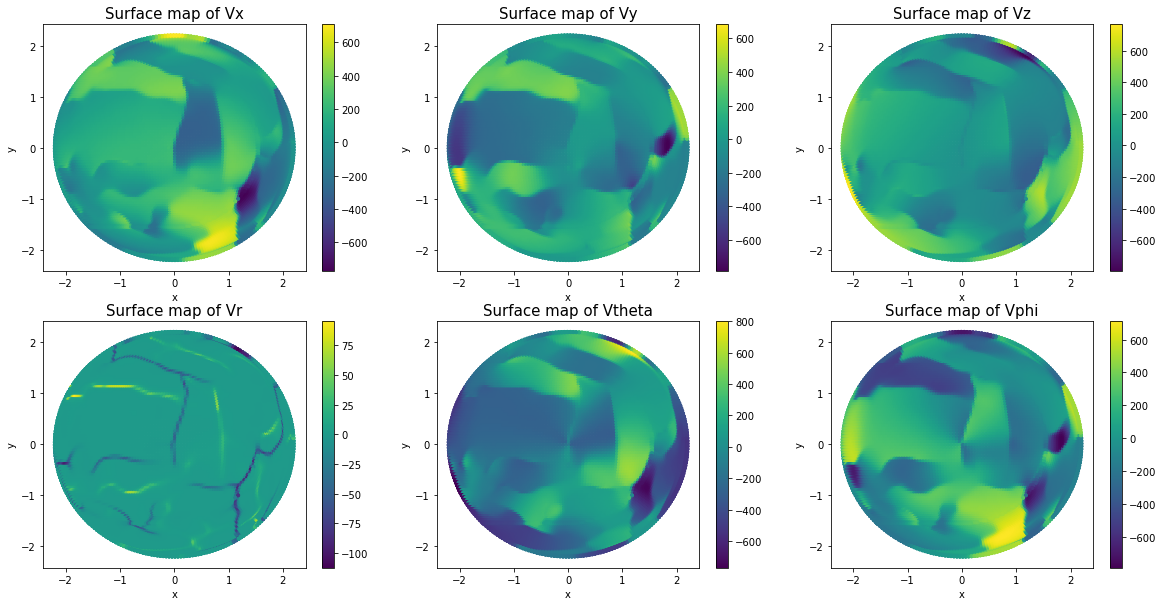

In [38]:
# Basic graphical representation of your data


#-- Mask to keep just surface points on the northern hemisphere
z            = np.array(list(sd.z1)+list(sd.z2))
layers       = np.array(list(sd.layers)*2)
mask_surface = np.where(np.logical_and(layers == np.amax(sd.slayers), z>0))[0]


#-- Pepare the grid
x1 = sd.x1
x2 = sd.x2
x = list(x1)+list(x2)     #stack Yin and Yang
x = np.array(x)[mask_surface]

y1 = sd.y1
y2 = sd.y2
y = list(y1)+list(y2)     #stack Yin and Yang
y = np.array(y)[mask_surface]


#-- The plot
fig = plt.figure(figsize=(20,10))
# -- Vx
ax1 = fig.add_subplot(2,3,1)
ax1.set_title('Surface map of Vx',size='15')
v1 = sd.vx1
v2 = sd.vx2
v = list(v1)+list(v2)     #stack Yin and Yang
v = np.array(v)[mask_surface]
cmap1 = ax1.scatter(x,y,c=v,s=10)
cbar1 = plt.colorbar(cmap1)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
# -- Vy
ax2 = fig.add_subplot(2,3,2)
ax2.set_title('Surface map of Vy',size='15')
v1 = sd.vy1
v2 = sd.vy2
v = list(v1)+list(v2)     #stack Yin and Yang
v = np.array(v)[mask_surface]
cmap2 = ax2.scatter(x,y,c=v,s=10)
cbar2 = plt.colorbar(cmap2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
# -- Vz
ax3 = fig.add_subplot(2,3,3)
ax3.set_title('Surface map of Vz',size='15')
v1 = sd.vz1
v2 = sd.vz2
v = list(v1)+list(v2)     #stack Yin and Yang
v = np.array(v)[mask_surface]
cmap3 = ax3.scatter(x,y,c=v,s=10)
cbar3 = plt.colorbar(cmap3)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
# -- Vr
ax4 = fig.add_subplot(2,3,4)
ax4.set_title('Surface map of Vr',size='15')
v1= sd.vr1
v2 = sd.vr2
v = list(v1)+list(v2)     #stack Yin and Yang
v = np.array(v)[mask_surface]
cmap4 = ax4.scatter(x,y,c=v,s=10)
cbar4 = plt.colorbar(cmap4)
ax4.set_xlabel('x')
ax4.set_ylabel('y')
# -- Vtheta
ax5 = fig.add_subplot(2,3,5)
ax5.set_title('Surface map of Vtheta',size='15')
v1 = sd.vtheta1
v2 = sd.vtheta2
v = list(v1)+list(v2)     #stack Yin and Yang
v = np.array(v)[mask_surface]
cmap5 = ax5.scatter(x,y,c=v,s=10)
cbar5 = plt.colorbar(cmap5)
ax5.set_xlabel('x')
ax5.set_ylabel('y')
# -- Vtheta
ax6 = fig.add_subplot(2,3,6)
ax6.set_title('Surface map of Vphi',size='15')
v1 = sd.vphi1
v2 = sd.vphi2
v = list(v1)+list(v2)     #stack Yin and Yang
v = np.array(v)[mask_surface]
cmap6 = ax6.scatter(x,y,c=v,s=10)
cbar6 = plt.colorbar(cmap6)
ax6.set_xlabel('x')
ax6.set_ylabel('y')
plt.show()

As detailed before, for a Yin Yang grid data fields and the grid are contained in a vetor and not in 3D matrices as for Cartesian geometry. Thus, it is not trivial to navigate on the grid. Flags and description fields of the grid are here to help you. In the following cell, an example of the computation of the vertical profile of the Pressure field on the entire grid.

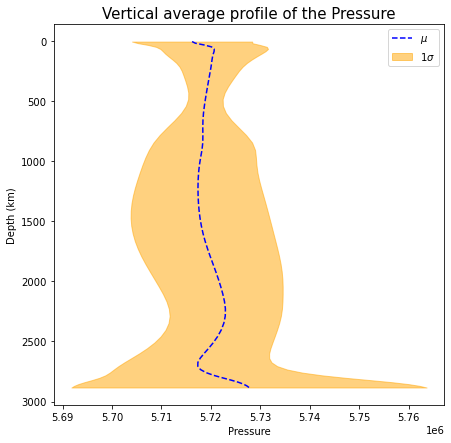

In [39]:
# Representation of the mean vertical profile of the Pressure field

# First the stack of the Yin and Yang grid
v     = np.array(list(sd.P1)+list(sd.P2))

# Initialization of mean and std matrices
nod   = sd.depths.shape[0]
vmean = np.zeros(nod)
vstd  = np.zeros(nod)

# You need to make a loop on each depth layers
for i in range(nod):
    ilayer = sd.slayers[i]                    # current depth layer
    gind = np.where(sd.layers == ilayer)[0]   # find good indices
    gind = np.array(2*list(gind))             # stack for Yin and Yang
    vmean[i] = np.mean(v[gind])         # Compute the mean
    vstd[i]  = np.std(v[gind])          # Compture the std
    

# The plot
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
ax.set_title('Vertical average profile of the Pressure',size=15)
ax.fill_betweenx(sd.depths,vmean-vstd,vmean+vstd,color='orange',alpha=0.5,label=r'$1\sigma$')
ax.plot(vmean,sd.depths,'--',c='blue',label=r'$\mu$')
ax.set_ylabel('Depth (km)')
ax.set_xlabel('Pressure')
plt.gca().invert_yaxis()
plt.legend()
plt.show()

You can also represent your data stored on your **StagData** instance **'sd'** in 3D using visualization package of **pypStag**. It will be the aim of a next lesson. In the following cell, a basic example using just the **mpl_toolkit** package of **Matplotlib**: Surface 3D map of the L2-norm of the Velocity.

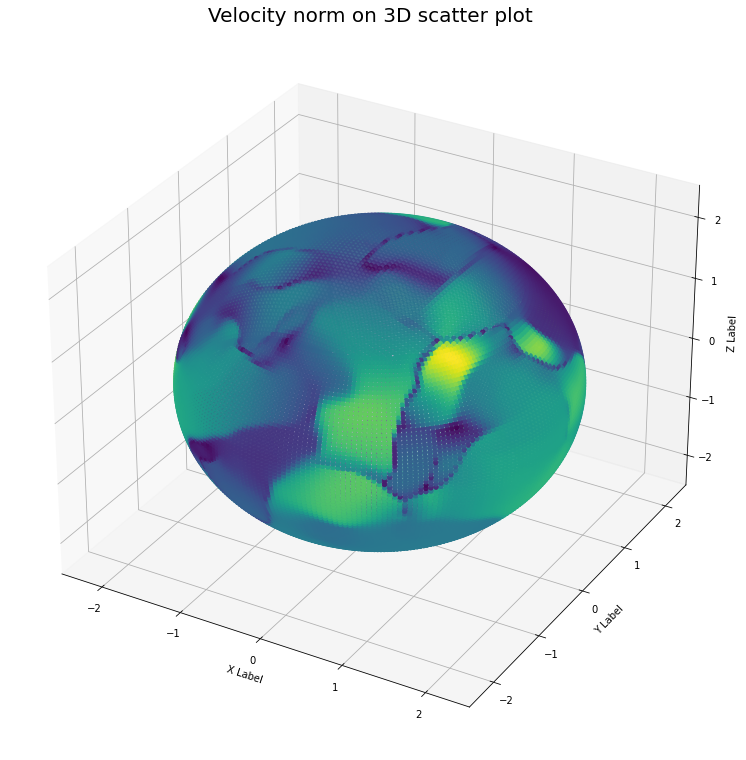

In [40]:
# Basic graphical representation of your data

mask_surface = np.where(sd.layers == np.amax(sd.slayers))[0]

v1 = sd.v1[mask_surface]
v2 = sd.v2[mask_surface]
v = list(v1)+list(v2)     #stack Yin and Yang

x1 = sd.x1[mask_surface]
x2 = sd.x2[mask_surface]
x = list(x1)+list(x2)     #stack Yin and Yang

y1 = sd.y1[mask_surface]
y2 = sd.y2[mask_surface]
y = list(y1)+list(y2)     #stack Yin and Yang

z1 = sd.z1[mask_surface]
z2 = sd.z2[mask_surface]
z = list(z1)+list(z2)     #stack Yin and Yang


# Using the mpl_toolkit package
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(13,15))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Velocity norm on 3D scatter plot',size=20)
cmap = ax.scatter(x, y, z, c=v)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

You have now all the necessary knowlegdes to be able to read the **stagyy** binary outputs on a Yin Yang geometry with **pypStag** and manipulate the grid and the data fields with Python.

### **3. Read and process Stag outputs with Spherical geometry**

Here we will see step by step how to read an output file of Stag with a spherical (but not Yin Yang) grid geometry using **pypStag**.

Let consider the output file _**'./test_data/ps01_eta00650'**_ containing a visocisty field (Scalar) in Spherical geometry. Contrary to the Yin Yang grid, the Spherical grid is just a piece of the sphere stored and descripe by a unique grid. The grid informations contained in the **stagyy** output binary file for this particular type of grid are for a cuboid. This cuboidal grid will be curved during the processing of the input grid to restore the true geometry.

In [47]:
# First, set the file name and the path:

directory = './test_data/'           # path to my data
fname     = 'ps01_eta00650'          # file name of my stagyy output under cartesian 3D geometry

In [48]:
# Then, creat our StagData object:

sd = StagData(geometry='spherical')  # call it sd and very important, specify the geometry! (see Figure 1 for allowed values)
sd.verbose = True                    # activate the verbose output if you want to follow what he is doing

We just created a data structure that will allow you to efficiently manipulate your Stag data.

Now, apply the internal function **.stagImport** to load Stag data on the good fields and compute several flags. Give just to the **stagImport** function the _path_ and the _file name_ of the file containing your stagyy data. You can specify in option a resampling parameter as well as a first (shallowest) and a last (deepest) index. Let see an example:

In [49]:
# Then load the file contents in your StagData object

sd.stagImport(directory, fname, resampling=[1,1,1])   # Here we resample the grid during the import (directly)
# Here we don't resample the grid

>> stagData| Reading and resampling: ps01_eta00650
>> stagData|   - 3D data detected
>> stagData|     -> Grid geometry compatible with cart3D or spherical
>> stagData|   - Original grid geometry:
>> stagData|     - Nx = 192
>> stagData|     - Ny = 192
>> stagData|     - Nz = 64
>> stagData|   - New grid geometry:
>> stagData|     - Nx = 192
>> stagData|     - Ny = 192
>> stagData|     - Nz = 64
>> stagData|   - Scalar field detected
>> stagData|     -> Viscosity
>> stagData| Reading and resampling operations done!


If you made a mistake in the definition of your stagData instance geometry, **pypStag** will raise an error except but not in all cases (impossible to make the difference between cart3D and spherical). So be careful.

Now, our Stagyy raw data are loaded in your StagData instance **'sd'** but they are not fully available and usable. They need to be processed according to their geometry to complete the loading. The processing of the spherical grid will consist in curve the initial cuboid grid. Furthermore, vectorial fields on spherical geometry will also be translate in ($r$,$\theta$,$\phi$) geometry.

In [50]:
# Then, process the raw data you load into your stagData object

sd.stagProcessing() 

>> stagData| Processing stag Data:
>> stagData|   - Grid Geometry
>> stagData|       - 3D cartesian grid geometry
>> stagData|       - Creation of the spherical grids
>> stagData|       - Build data grid for scalar field
>> stagData| Processing of stag data done!


Now, the contents of your stag output file is stored into the **StagData** instance **'sd'**! Notice that the type of your **StagData** instance is **stagData.StagSphericalGeometry** (see **Figure 1**).

In [28]:
print('Type of my stagData instance:\t',type(sd))

Type of my stagData instance:	 <class 'stagData.StagSphericalGeometry'>


Here the description of all the fields associated to a **stagData.StagSphericalGeometry** that you would be likely to use:

<img src="./img/StagObjects_03_03.png" alt="pypStag types-geometries relations" width="1200" >

**Figure 6** Main fields of a stagData.StagSphericalGeomtry object. In **violet** corresponds to the description fields of the data, **red** to the grid, **light orange** to scalar field (if the stagyy binary contained a scalar field, else, created but stay empty), **blue** (light and dark) to vectorial field (if the stagyy binary contained a vectorial field, else, created but stay empty). In **light blue**, vectorial field in cartesian (except .Pi). In **dark blue**, vectorial field in spherical geometry (see Figure 4 for the geometric convention of the ($r$,$\theta$,$\phi$) base).

Now, you can manipulate your data. **Figure 6** describe you all usefull fields. Here, some examples:

In [51]:
# You can have a look on the grid properties playing with descriptive fields (violet on figure 2)

print('-- File description:')
print('Path of my binary file:\t',sd.path)
print('File name:\t\t',sd.fname)
print('My resampling:\t\t',sd.resampling)
print('\n-- Grid description')
print('Original Nx, Ny, Nz:\t',(sd.nx0,sd.ny0,sd.nz0))
print('Current Nx, Ny, Nz:\t',(sd.nx,sd.ny,sd.nz))
print('Shape of the grid in spherical projection:\t',sd.x.shape)
print('Shape of the grid in cartesian projection:\t',sd.xc.shape)
print('\n-- Data description:')
print('Iteration number:\t',sd.ti_step)
print('Internal time:\t\t',sd.simuAge)
print('Field Nature:\t\t',sd.fieldNature)
print('Type of field:\t\t',sd.fieldType)

-- File description:
Path of my binary file:	 test_data/ps01_eta00650
File name:		 ps01_eta00650
My resampling:		 [1, 1, 1]

-- Grid description
Original Nx, Ny, Nz:	 (192, 192, 64)
Current Nx, Ny, Nz:	 (192, 192, 64)
Shape of the grid in spherical projection:	 (192, 192, 64)
Shape of the grid in cartesian projection:	 (192, 192, 64)

-- Data description:
Iteration number:	 10069
Internal time:		 0.029557575
Field Nature:		 Scalar
Type of field:		 Viscosity


Stagyy data loaded in the current instance of **stagData** object (**'sd'**) corresponds to the viscosity field on a spherical grid geometry at a single time step. This grid geometry is almost equivalent to a cartesian 3D grid geometry with some subtleties. The viscosity field contained in the stagyy binary file you read with **pypStag** is a scalar field. During the building of the **stagData** instance, the data structures of scalar field and vectorial field were both created. However, as the binary file you read contains viscosity data, only scalar field of your **stagData** instance have been filled (**sd.v**, see **Figure 6**). **sd.vx**, **sd.vy** and **sd.vz** stay empty. However, if your input stagyy binary file contains velocity-pressure data (for instance), all vectorial field of **sd** will be filled (**sd.vx**, **sd.vy** and **sd.vz**) as well as the particular pressure field **sd.P** (because of the 'velocity-pressure') and the scalar field **sd.v** which will contained the L2-norm of the vectorial field.

In [52]:
# Illustration of fields created during the processing:

print('-- Fields:')
print('Shape of the scalar field (sd.v):\t\t\t',sd.v.shape)                 # will be filled with the L2-norm of the vectorial field in the case of the processing of a vectorial field
print('Shape of the vectorial fields (sd.vx, sd.vy...):\t',sd.vx.shape)

-- Fields:
Shape of the scalar field (sd.v):			 (192, 192, 64)
Shape of the vectorial fields (sd.vx, sd.vy...):	 (0,)


**Note:** *You can run again all cells of this lesson changing the input binary file with a vectorial field.*

**pypStag** has is own visualisation package that will be the aim of a next lesson. For the moment, let just use Matplotlib to represent data on your **stagData** instance. Let's represent on two maps the surface on the CMB of the log10 of the viscosity field loaded on **'sd'**.

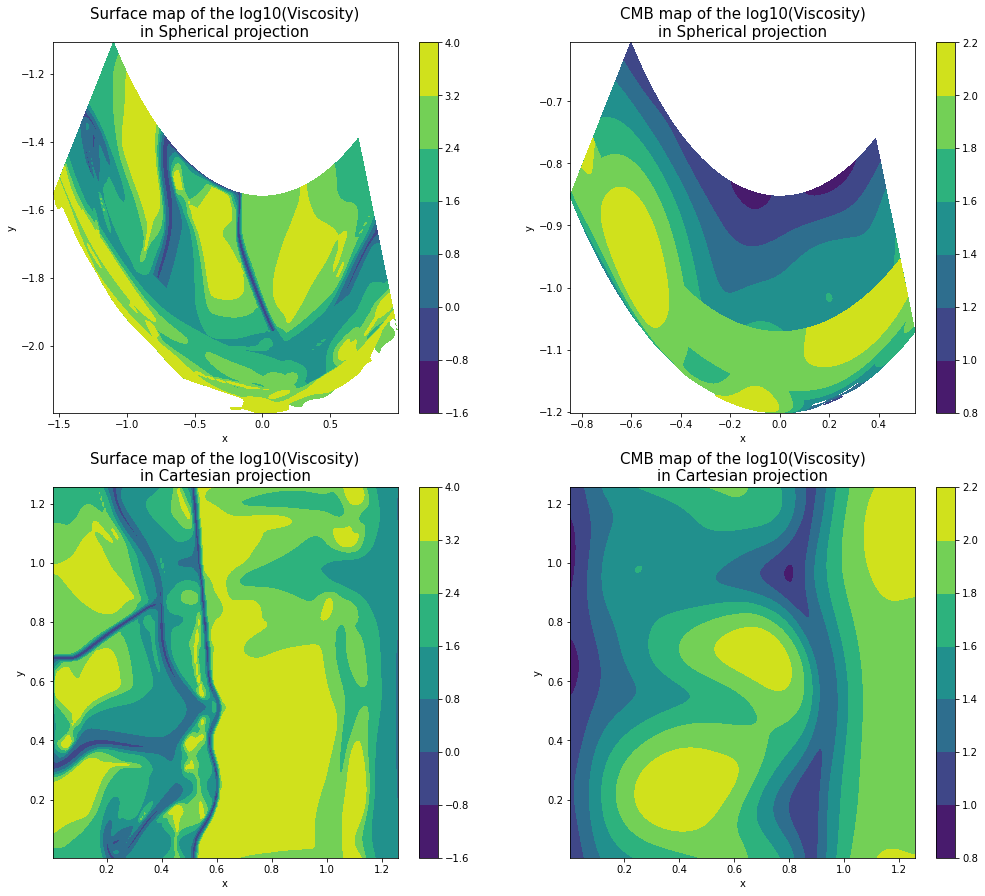

In [53]:
# Basic graphical representation of your data

# The log10 of the viscosity
v = np.log10(sd.v)

# The plot
fig = plt.figure(figsize=(17,15))

# In Spherical projection:
ax1 = fig.add_subplot(2,2,1)
ax1.set_title('Surface map of the log10('+sd.fieldType+')\nin Spherical projection',size='15')
cmap1 = ax1.contourf(sd.x[:,:,-1],sd.y[:,:,-1],v[:,:,-1],)
cbar1 = plt.colorbar(cmap1)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax2 = fig.add_subplot(2,2,2)
ax2.set_title('CMB map of the log10('+sd.fieldType+')\nin Spherical projection',size='15')
cmap2 = ax2.contourf(sd.x[:,:,0],sd.y[:,:,0],v[:,:,0],)
cbar2 = plt.colorbar(cmap2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# In Cartesian projection:
ax3 = fig.add_subplot(2,2,3)
ax3.set_title('Surface map of the log10('+sd.fieldType+')\nin Cartesian projection',size='15')
cmap3 = ax3.contourf(sd.xc[:,:,-1],sd.yc[:,:,-1],v[:,:,-1],)
cbar3 = plt.colorbar(cmap3)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax4 = fig.add_subplot(2,2,4)
ax4.set_title('CMB map of the log10('+sd.fieldType+')\nin Cartesian projection',size='15')
cmap4 = ax4.contourf(sd.xc[:,:,0],sd.yc[:,:,0],v[:,:,0],)
cbar4 = plt.colorbar(cmap4)
ax4.set_xlabel('x')
ax4.set_ylabel('y')
plt.show()
plt.show()

As seen before, for the Spherical grid geometry, fields and grid matrices are explicitly 3D (not the case for the Yin yang geometry). Thus, is easy to navigate on the grid. In the following cell, an example of this property with the computation of the mean vertical profile of the log10 of the Viscosity.

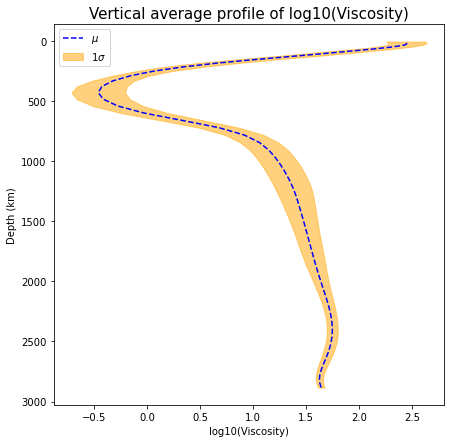

In [54]:
# Representation of the mean log10 viscosity vertical profile

# The average vertical profile of the log10(viscosity)
v     = np.log10(sd.v)
vmean = np.mean(np.mean(v,axis=0),axis=0)
vstd  = np.std(np.std(v,axis=0),axis=0)

# The plot
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
ax.set_title('Vertical average profile of log10('+sd.fieldType+')',size=15)
ax.fill_betweenx(sd.depths,vmean-vstd,vmean+vstd,color='orange',alpha=0.5,label=r'$1\sigma$')
ax.plot(vmean,sd.depths,'--',c='blue',label=r'$\mu$')
ax.set_ylabel('Depth (km)')
ax.set_xlabel('log10('+sd.fieldType+')')
plt.gca().invert_yaxis()
plt.legend()
plt.show()

You can also represent your data stored on your **StagData** instance **'sd'** in 3D using visualization package of **pypStag**. It will be the aim of a next lesson. In the following cell, a basic example using just the **mpl_toolkit** package of **Matplotlib**: Surface 3D map of the log10 of the Viscosity.

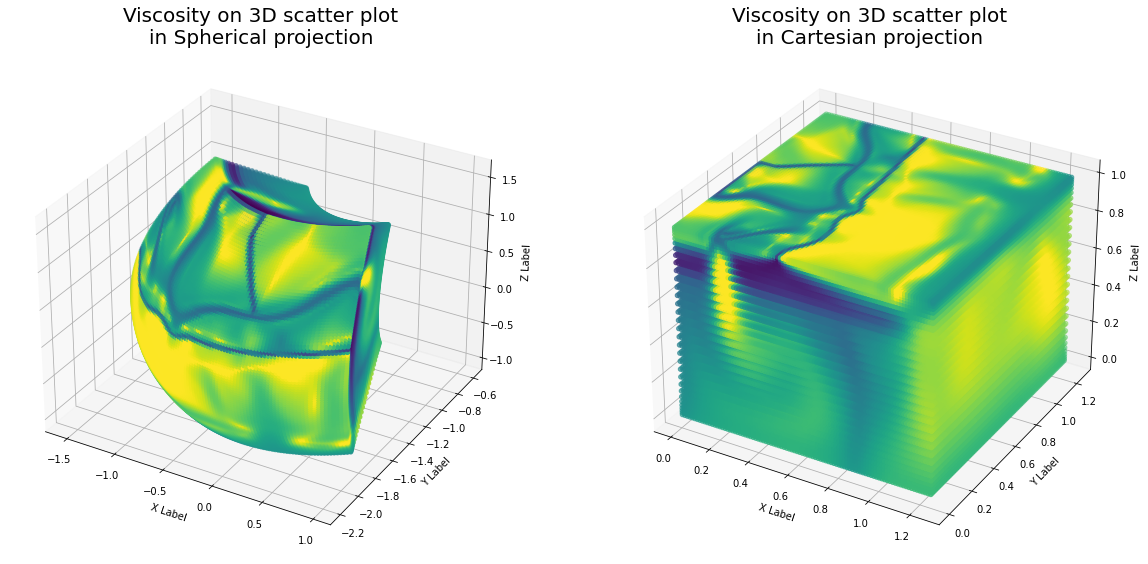

In [55]:
# Using the mpl_toolkit package
from mpl_toolkits.mplot3d import Axes3D

# -- Relieve the graphics module by resampling data (and grid)
# In spherical 
xs  = sd.x[::2,::2,::2]
ys  = sd.y[::2,::2,::2]
zs  = sd.z[::2,::2,::2]
# In cartesian
xsc = sd.xc[::2,::2,::2]
ysc = sd.yc[::2,::2,::2]
zsc = sd.zc[::2,::2,::2]
# The field
vs = np.log10(sd.v[::2,::2,::2])

# The plot
fig = plt.figure(figsize=(20,15))

# In spherical
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_title('Viscosity on 3D scatter plot\nin Spherical projection',size=20)
cmap = ax1.scatter(xs, ys, zs, c=vs)
ax1.set_xlabel('X Label')
ax1.set_ylabel('Y Label')
ax1.set_zlabel('Z Label')

# In cartesian
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_title('Viscosity on 3D scatter plot\nin Cartesian projection',size=20)
cmap = ax2.scatter(xsc, ysc, zsc, c=vs)
ax2.set_xlabel('X Label')
ax2.set_ylabel('Y Label')
ax2.set_zlabel('Z Label')
plt.show()

You have now all the necessary knowlegdes to be able to read the **stagyy** binary outputs on a Spherical geometry with **pypStag** and manipulate the grid and the data fields with Python.